In [16]:
import xarray as xr
import matplotlib.cm as cm
import matplotlib.pylab as plt
import numpy as np
from scipy import interpolate
from scipy.interpolate import RectBivariateSpline
import pandas as pd

In [2]:
path = "/home/jorge/tsunami-warning/dataset/batimetrias/"

## Nombres batimetrias.

In [3]:
mod0 = 'L0_G'
mod1 = 'L1_C'
mod2 = 'L1_V'
mod3 = 'L2_C'
mod4 = 'L2_V'
mod5 = 'L3_C'
mod6 = 'L3_V'

#### abrir archivos .grd 
Se guardan en diccionarios llave/valor. 

In [4]:
mod  = [mod6,mod4,mod0]
bases = {}
for m in mod:
    base = xr.open_dataset(path+m+'.grd')
    bases[m]=base

In [5]:
base3 = bases['L3_V']
base2 = bases['L2_V']
base0 = bases['L0_G']

lon3 = base3.variables['x'][:].data
lat3 = base3.variables['y'][:].data
grd3 = base3.variables['z'][:].data

lon2 = base2.variables['x'][:].data
lat2 = base2.variables['y'][:].data
grd2 = base2.variables['z'][:].data

lon0 = base0.variables['x'][:].data
lat0 = base0.variables['y'][:].data
grd0 = base0.variables['z'][:].data

base_inter = RectBivariateSpline(lat3,lon3,grd3)
c_agua = plt.cm.Blues_r(np.linspace(0,0.5,128))
c_terr = plt.cm.copper(np.linspace(0.25,0.75,128))
cols   = np.vstack((c_agua, c_terr))
cmap   = cm.colors.LinearSegmentedColormap.from_list("q", cols)

In [6]:
print('lat max:',lat3.max())
print('lat min:',lat3.min())
print('lon max:',lon3.max())
print('lon min:',lon3.min())

lat max: -33.00263621012367
lat min: -33.051529439290334
lon max: 288.4765218098964
lon min: 288.360961914063


## Gráfico para ubicar boyas.
En este caso se esta trabajando con las batimetrias de coquimbo y valpo-viña, activar o configurar figsize según corresponda

<IPython.core.display.Javascript object>


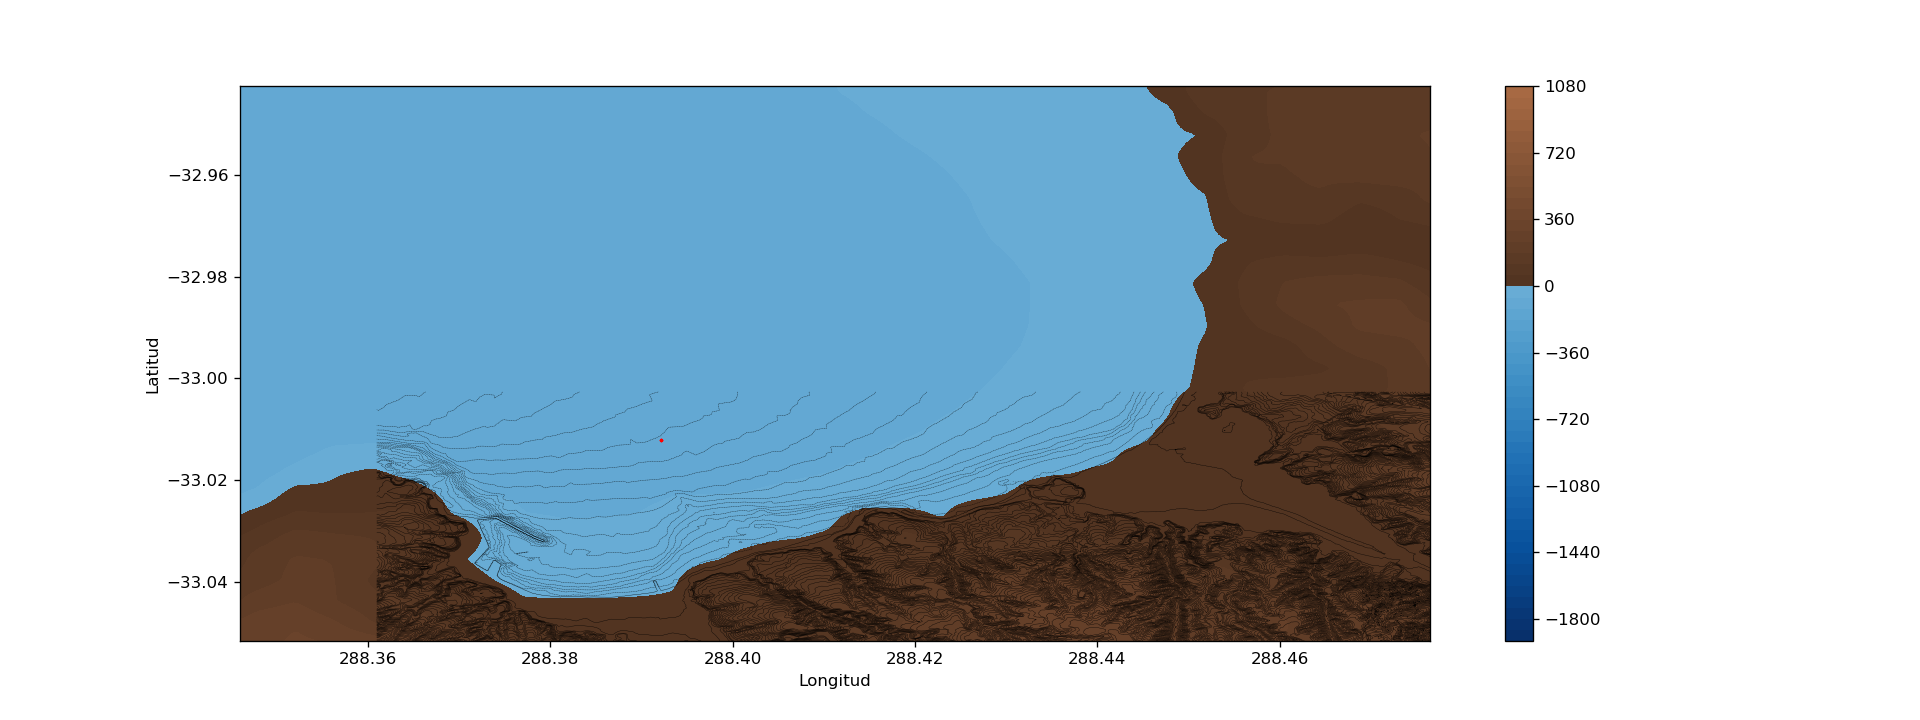

In [53]:

%matplotlib notebook
io = 0
#fig = plt.figure(figsize=(10,14), dpi=140)# coquimbo
fig = plt.figure(figsize=(16,6), dpi=120)# valpo

ax = plt.gca()
#ax.invert_yaxis()

plt.contour(lon3,lat3,grd3, 80, linewidths=0.2, colors='k')
plt.contourf(lon3,lat3,grd3, 50,cmap=cmap,
                vmax=abs(grd3).max(), vmin=-abs(grd3).max(),zorder =1)

plt.contourf(lon2,lat2,grd2, 50,cmap=cmap,
                vmax=abs(grd2).max(), vmin=-abs(grd2).max(),zorder =1)





plt.xlim(lon3.min()-0.015,lon3.max())
plt.ylim(lat3.min(),lat3.max()+0.06)
plt.colorbar()  # draw colorbar

#plt.title('Batimetria Bahia Coquimbo' )#% npts)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
pos = []          
def onclick(event):
    pos.append([event.xdata,event.ydata])
    ppx, ppy = zip(*pos)                          
    plt.scatter(ppx,ppy,s=2,c='r',marker='x')     
    plt.draw()                                    
fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [51]:
pos

[[288.38384446716145, -33.019572498957025],
 [288.3949218776782, -33.0201617480326],
 [288.40095413092996, -33.022911577051964],
 [288.4053412242039, -33.01093017918189],
 [288.39031542974055, -33.01348359184273],
 [None, None],
 [288.4052315468721, -33.019572498957025],
 [288.41093476812824, -33.0193760825985]]

In [12]:
pos= np.loadtxt(path+'boyas.txt')

<IPython.core.display.Javascript object>


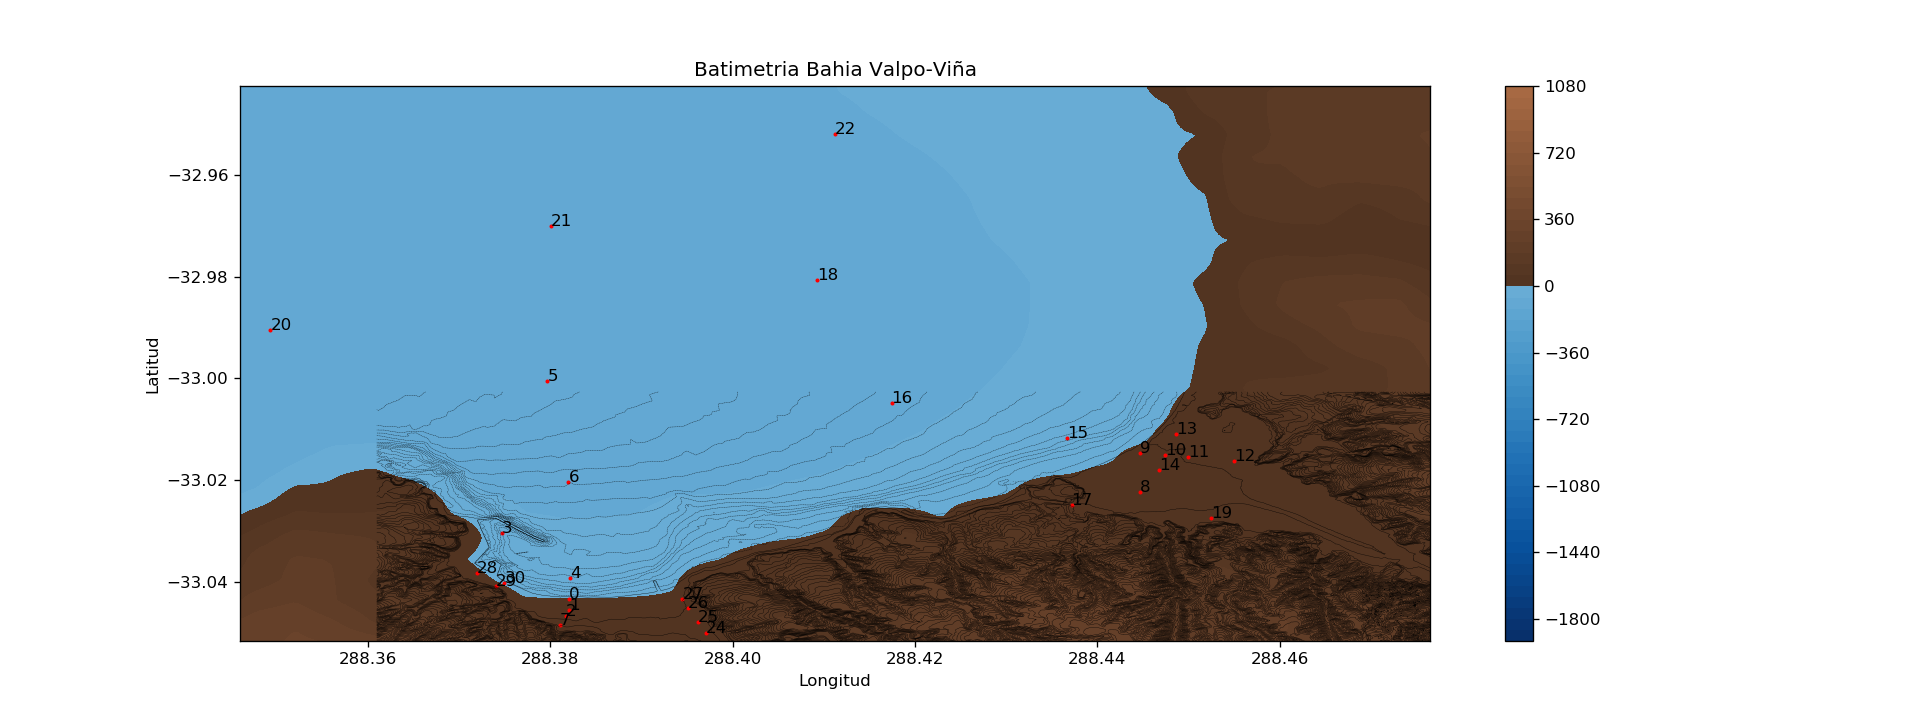

In [14]:
%matplotlib notebook
io = 0
#fig = plt.figure(figsize=(10,14), dpi=140)# coquimbo
fig = plt.figure(figsize=(16,6), dpi=120)# valpo

ax = plt.gca()
#ax.invert_yaxis()

plt.contour(lon3,lat3,grd3, 80, linewidths=0.2, colors='k')
plt.contourf(lon3,lat3,grd3, 50,cmap=cmap,
                vmax=abs(grd3).max(), vmin=-abs(grd3).max(),zorder =1)

plt.contourf(lon2,lat2,grd2, 50,cmap=cmap,
                vmax=abs(grd2).max(), vmin=-abs(grd2).max(),zorder =1)





plt.xlim(lon3.min()-0.015,lon3.max())
plt.ylim(lat3.min(),lat3.max()+0.06)
plt.colorbar()  # draw colorbar

for i in range(0,len(pos)):
    plt.scatter(pos[i][0], pos[i][1], s=2, color='red')
    plt.annotate(str(i+io), (pos[i][0], pos[i][1]))
plt.title('Batimetria Bahia Valpo-Viña' )#% npts)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.savefig(path+mod[0]+'dat'+'.png', dpi=100)
plt.show()


In [41]:
Localidades = pd.read_csv(path+'LocalidadesCosta.txt', sep=' ')
Localidades['Longitud']+=360
Localidades

Localidad   Latitud   Longitud
0          Arica -18.47460  289.70208
1        Iquique -20.21326  289.84973
2      Tocopilla -22.09198  289.80208
3     Mejillones -22.93603  289.80137
4    Antofagasta -23.65236  289.60460
5         Taltal -25.40873  289.51642
6       Chañaral -26.34382  289.38305
7        Caldera -27.06887  289.17965
8         Huasco -28.25842  288.98222
9       Coquimbo -29.95332  288.66053
10    Valparaiso -33.03600  288.37037
11     Pichilemu -34.38412  288.08935
12  Constitucion -35.33321  287.58844
13    Talcahuano -36.72494  286.88316
14          Lebu -37.67776  286.40943
15      Valdivia -39.81422  286.75411
16         Ancud -41.87070  286.18378

<IPython.core.display.Javascript object>


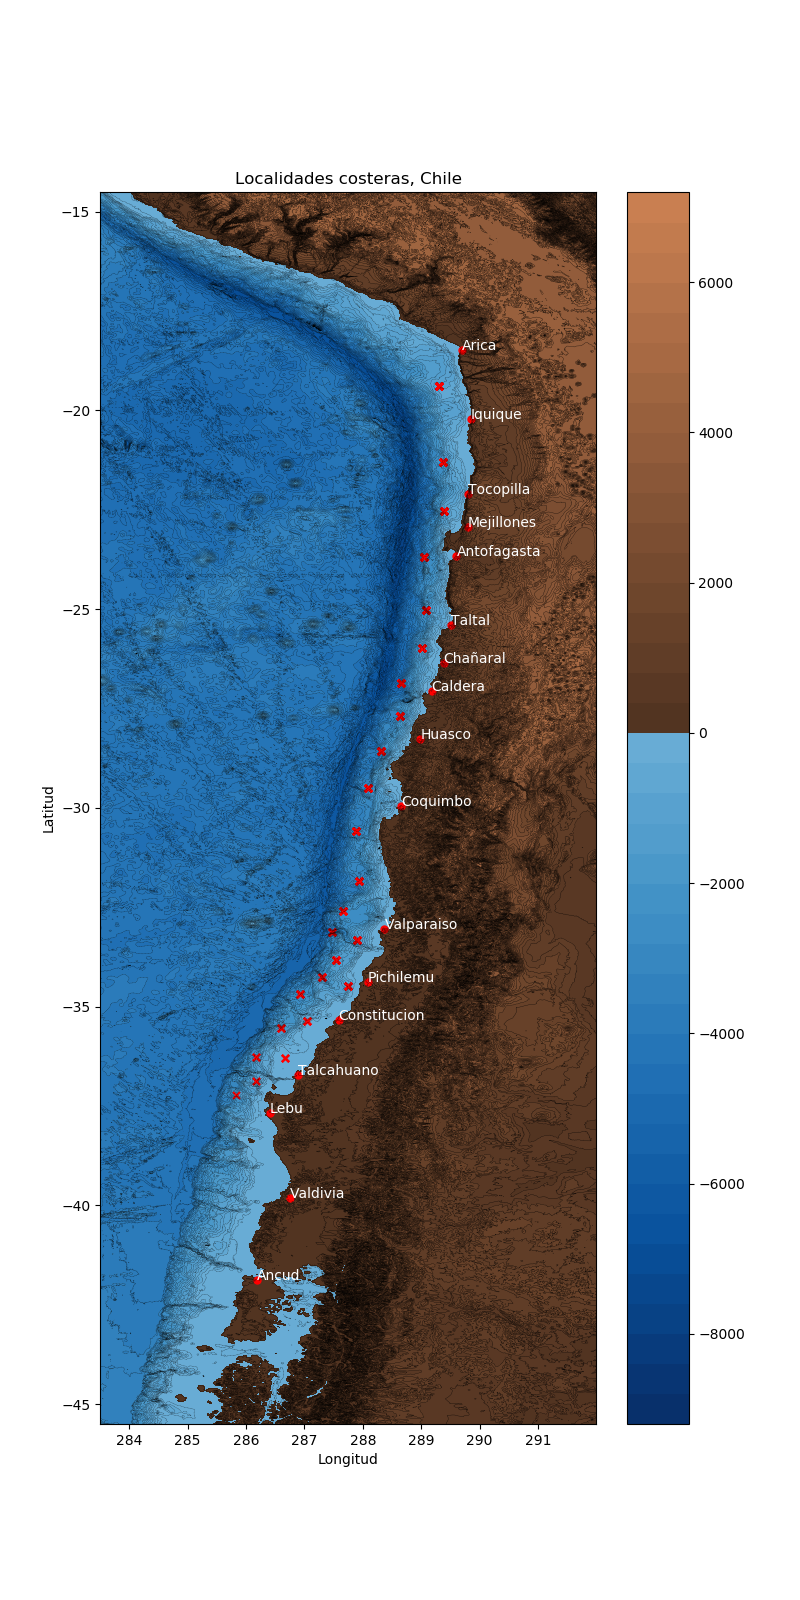

In [57]:
%matplotlib notebook
io = 0
#fig = plt.figure(figsize=(10,14), dpi=140)# coquimbo
fig = plt.figure(figsize=(8,16), dpi=100)# valpoa
ax = plt.gca()
#ax.invert_yaxis()

plt.contour(lon0,lat0,grd0, 80, linewidths=0.2, colors='k')
plt.contourf(lon0,lat0,grd0, 50,cmap=cmap,
                vmax=abs(grd0).max(), vmin=-abs(grd0).max(),zorder =1)





plt.xlim(283.5,lon0.max())
#plt.ylim(lat3.min(),lat3.max()+0.06)
plt.colorbar()  # draw colorbar

#plt.title('Batimetria Bahia Coquimbo' )#% npts)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
for i in range(len(Localidades)):
    pos = Localidades.loc[i]
    plt.scatter(pos[2], pos[1], s=25, color='red')
    plt.annotate(pos[0], (pos[2], pos[1]),color='white')
plt.title('Localidades costeras, Chile' )#% npts)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

pos_tsu = []          
def onclick(event):
    pos_tsu.append([event.xdata,event.ydata])
    ppx, ppy = zip(*pos_tsu)                          
    plt.scatter(ppx,ppy,s=25,c='r',marker='x');     
    plt.draw()                                    
fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

<IPython.core.display.Javascript object>


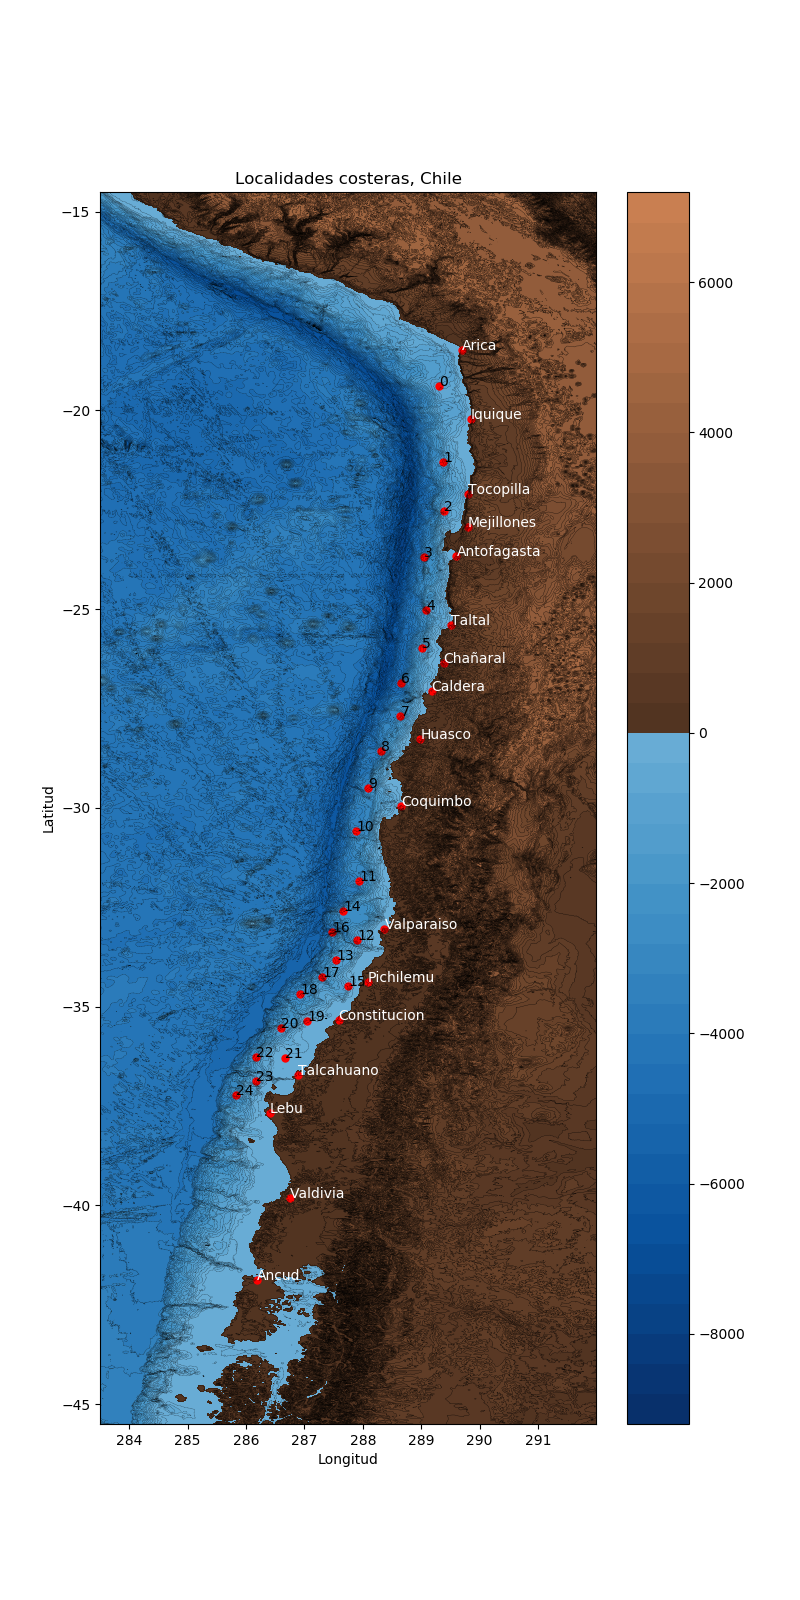

In [59]:
%matplotlib notebook
io = 0
#fig = plt.figure(figsize=(10,14), dpi=140)# coquimbo
fig = plt.figure(figsize=(8,16), dpi=100)# valpoa
ax = plt.gca()
#ax.invert_yaxis()

plt.contour(lon0,lat0,grd0, 80, linewidths=0.2, colors='k')
plt.contourf(lon0,lat0,grd0, 50,cmap=cmap,
                vmax=abs(grd0).max(), vmin=-abs(grd0).max(),zorder =1)





plt.xlim(283.5,lon0.max())
#plt.ylim(lat3.min(),lat3.max()+0.06)
plt.colorbar()  # draw colorbar

#plt.title('Batimetria Bahia Coquimbo' )#% npts)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
for i in range(len(Localidades)):
    pos = Localidades.loc[i]
    plt.scatter(pos[2], pos[1], s=25, color='red')
    plt.annotate(pos[0], (pos[2], pos[1]),color='white')
    

for i in range(0,len(pos_tsu)):
    plt.scatter(pos_tsu[i][0], pos_tsu[i][1], s=25, color='red')
    plt.annotate(str(i), (pos_tsu[i][0], pos_tsu[i][1]))
plt.title('Localidades costeras, Chile' )#% npts)
plt.xlabel('Longitud')
plt.ylabel('Latitud')


plt.show()

## Falta gurdar archivo coordenadas de las boyas
